In [21]:
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [7]:
# Load the data
br_donnee_brute_merch_22_23=pd.read_csv("brico donnée/Données brutes MERCH 22 23.csv")
br_sales_22_23=pd.read_csv("brico donnée/Données brutes SELL IN 22 23.csv")
br_pp_22_23=pd.read_csv("brico donnée/PP 22 23.csv")
br_visites_annuelles=pd.read_csv("brico donnée/VISITES ANNUELLES 22 23.csv")

lr_pp_22_23=pd.read_csv("leroy merlin /PP 22 23.csv")
lr_sales_22_23=pd.read_csv("leroy merlin /CA SELL IN LM 22 23.csv")
lr_merch_22_23=pd.read_csv("leroy merlin /Données brutes MERCH 22 23.csv")
lr_visites_annuelles=pd.read_csv("leroy merlin /VISITES ANNUELLES 22 23.csv")

In [8]:
# Fonction de nettoyage
def clean_data(df):
    # Renommer les colonnes pour cohérence
    df.columns = df.columns.str.strip().str.replace("\n", "_").str.replace(" ", "_")
    # Convertir les montants (euros) et supprimer les espaces
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.replace("€", "", regex=False).str.replace(",", ".", regex=False).str.replace("\s", "", regex=True)
    return df

# Nettoyage des données Bricomarché
br_donnee_brute_merch_22_23 = clean_data(br_donnee_brute_merch_22_23)
br_sales_22_23 = clean_data(br_sales_22_23)
br_pp_22_23 = clean_data(br_pp_22_23)
br_visites_annuelles = clean_data(br_visites_annuelles)

# Nettoyage des données Leroy Merlin
lr_pp_22_23 = clean_data(lr_pp_22_23)
lr_sales_22_23 = clean_data(lr_sales_22_23)
lr_merch_22_23 = clean_data(lr_merch_22_23)
lr_visites_annuelles = clean_data(lr_visites_annuelles)

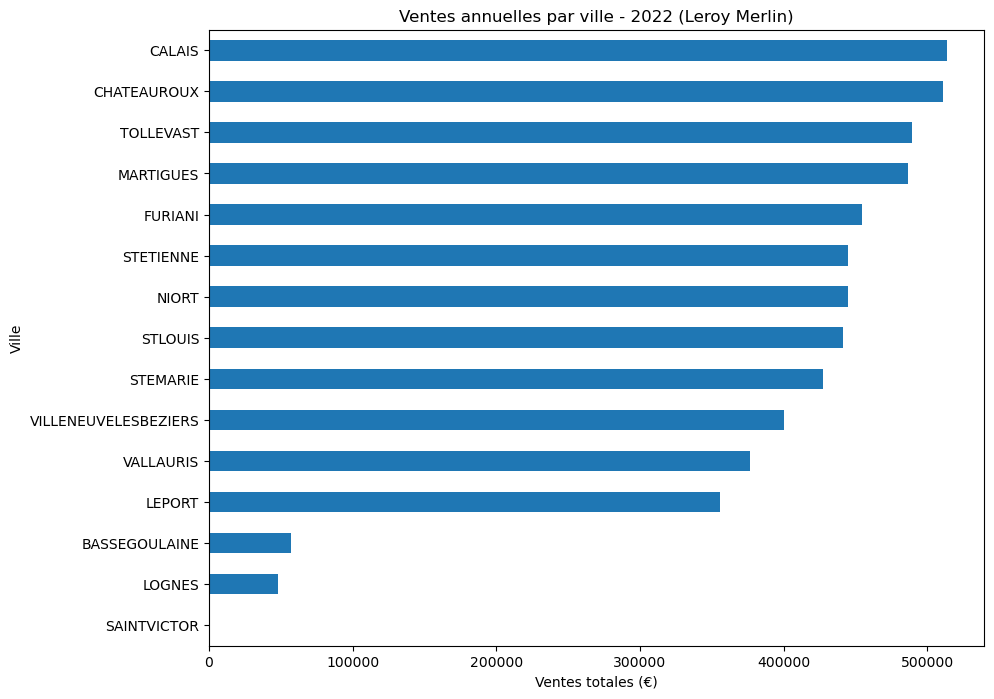

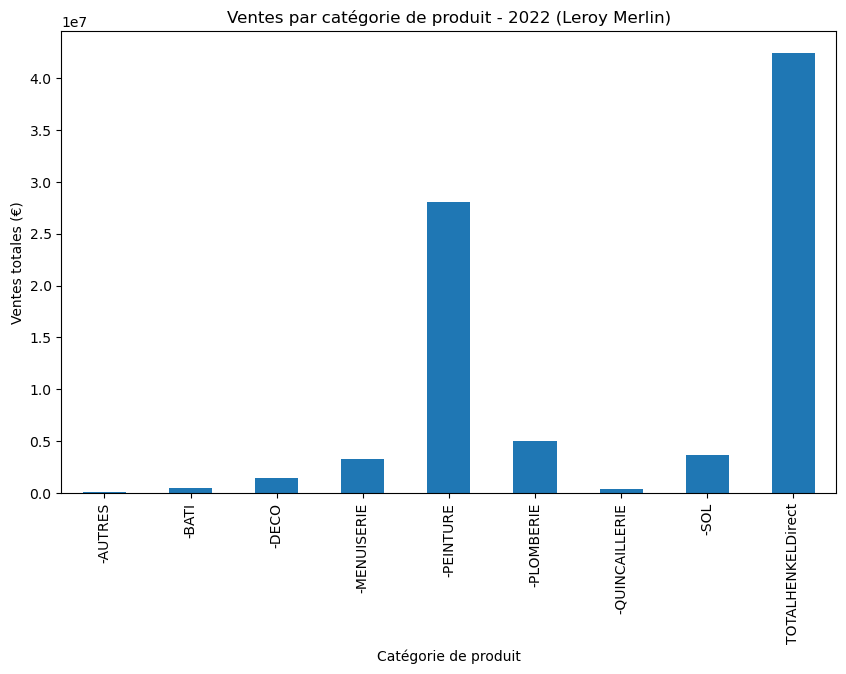

In [15]:
import matplotlib.pyplot as plt

# Évolution des ventes totales chez Leroy Merlin
lr_sales_22_23['Total_annuel_2022'] = pd.to_numeric(lr_sales_22_23['Total_annuel_2022'], errors='coerce')
lr_sales_22_23.groupby('Ville')['Total_annuel_2022'].sum().sort_values().head(15).plot(kind='barh', figsize=(10, 8))
plt.title("Ventes annuelles par ville - 2022 (Leroy Merlin)")
plt.xlabel("Ventes totales (€)")
plt.ylabel("Ville")
plt.show()

# Ventes par catégorie de produit pour Leroy Merlin
lr_sales_22_23.groupby('Famille')['Total_annuel_2022'].sum().plot(kind='bar', figsize=(10, 6))
plt.title("Ventes par catégorie de produit - 2022 (Leroy Merlin)")
plt.xlabel("Catégorie de produit")
plt.ylabel("Ventes totales (€)")
plt.show()

In [23]:
lr_merch_22_23

,ANNEE,CODE_STATIGEST,RAISON_SOCIALE,CODE_POSTAL,VILLE,TYPE_PARTENARIAT,PASSAGE,HEURES,BUDGET_ESTIMÉ,CODE_Chef_de_secteur
0,2022,81n45,LEROYMERLIN-088,81000,ALBI,Merch,Quinzaine,4h00,3541.00,315
1,2022,20r81,LEROYMERLIN-069,80085,AMIENS,Merch,Quinzaine,2h00,1771.00,521
2,2022,20rh8,LEROYMERLIN-075,90400,ANDELNANS,Merch,Semaine,3h30,6552.00,323
3,2022,20r24,LEROYMERLIN-154,74112,ANNEMASSECEDEX,Merch,Semaine,3h00,5044.00,323
4,2022,20ppt,LEROYMERLIN-048,62000,ARRAS,Merch,Semaine,2h00,3362.00,521
...,...,...,...,...,...,...,...,...,...,...
292,2023,20pkx,LEROYMERLIN-011,59650,VILLENEUVED'ASCQ,Merch,Semaine,3h00,5104.00,499
293,2023,20ueh,LEROYMERLIN-101,34420,VILLENEUVELESBEZIERS,Merch,Quinzaine,2h00,1701.00,441
294,2023,20rkj,LEROYMERLIN-021,94408,VITRYSURSEINE,Merch,Semaine,4h00,6806.00,311
295,2023,20pxm,LEROYMERLIN-169,69390,VOURLES,Merch,Semaine,4h00,6806.00,348


In [26]:
lr_pp_22_23

,ANNEE,CODE_DU_POINT_DE_VENTE,Code_IDH,RAISON_SOCIALE,CODE_POSTAL,VILLE,CODE_Chef_de_secteur,RAYON,NATURE,TYPE_ACCORD,STATUT_ACCORD,MODALITÉS,PAIEMENT,PÉRIODE,BUDGET_ACCORD_HT_€
0,2023,20r81,134129,LEROYMERLIN-069,80085,AMIENS,521,Peinture,Promo,NaN,Signé,ValeurFixe,PP,NaN,2050.00
1,2022,20r81,134129,LEROYMERLIN-069,80085,AMIENS,521,Peinture,Promo,CROSSMKTREVTSMUR-PLAFONDS-PLANCHERS,NaN,NaN,NaN,NaN,100.00
2,2022,20r81,134129,LEROYMERLIN-069,80085,AMIENS,521,Peinture,Promo,PODIUMCOLLES&MASTICS,NaN,NaN,NaN,NaN,560.00
3,2022,20rh8,107262,LEROYMERLIN,90400,Andelnans,323,Peinture,Promo,TGCAISSESG3+POWERTAPE,NaN,NaN,NaN,NaN,800.00
4,2022,20rh8,107262,LEROYMERLIN,90400,Andelnans,323,Peinture,Promo,CROSSMKTMASTICCOLLESCROSSETGONDOLEBASSE,NaN,NaN,NaN,NaN,4500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2022,20pxm,1612695,LEROYMERLIN-169,69390,VOURLES,348,Peinture,Promo,CROSSMKTCOLLESMASTICSRUBSONPATTEX,NaN,NaN,NaN,NaN,700.00
655,2022,20pxm,1612695,LEROYMERLIN-169,69390,VOURLES,348,Peinture,Promo,CROSSMKTCOLL3ESMASTICSRUBSONPATTEX,NaN,NaN,NaN,NaN,1400.00
656,2023,20pkv,2171816,LEROYMERLIN-183,59119,WAZIERS,521,Peinture,Promo,NaN,Signé,ValeurFixe,PP,Trimestre3,1033.00
657,2023,20pkv,2171816,LEROYMERLIN-183,59119,WAZIERS,521,Peinture,Promo,NaN,Signé,ValeurFixe,PP,Trimestre4,1200.00


In [24]:
lr_sales_22_23

,Code_du_Point_de_Vente,Raison_Sociale,Code_Postal,Ville,Code_Chef_de_Secteur_Henkel,Total_Famille,Famille,Total_annuel_2022,Total_annuel_2023,Total_annuel_Evol,...,Septembre_Evol,Octobre_2022,Octobre_2023,Octobre_Evol,Novembre_2022,Novembre_2023,Novembre_Evol,Décembre_2022,Décembre_2023,Décembre_Evol
0,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,3.39%,24374.0,23956.0,-1.72%,19117.0,17205.0,-10%,20117.0,24792.0,23.24%
1,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,NaN,TOTALHENKELDirect,214557.0,241343.0,12.48%,...,3.39%,24374.0,23956.0,-1.72%,19117.0,17205.0,-10%,20117.0,24792.0,23.24%
2,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,NaN,-PEINTURE,140737.0,166244.0,18.12%,...,25.14%,16428.0,17645.0,7.40%,13351.0,12890.0,-3.45%,14944.0,18552.0,24.14%
3,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,NaN,-MENUISERIE,19030.0,22515.0,NaN,...,-39.17%,3654.0,1310.0,-64.16%,1291.0,636.0,-50.73%,1046.0,1327.0,26.81%
4,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,NaN,-PLOMBERIE,18757.0,16778.0,NaN,...,-51.27%,1907.0,1975.0,3.57%,1096.0,941.0,-14.16%,777.0,1132.0,45.63%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-PLOMBERIE,5488.0,5525.0,NaN,...,-49.45%,336.0,NaN,NaN,408.0,NaN,NaN,NaN,NaN,NaN
1419,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-SOL,3911.0,8245.0,NaN,...,703.59%,485.0,NaN,NaN,355.0,214.0,-39.71%,NaN,79.0,NaN
1420,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-DECO,4968.0,5349.0,NaN,...,39.96%,563.0,NaN,NaN,NaN,661.0,NaN,NaN,NaN,NaN
1421,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-QUINCAILLERIE,2468.0,4053.0,NaN,...,200%,462.0,207.0,-55.11%,NaN,210.0,NaN,NaN,NaN,NaN


In [27]:
lr_visites_annuelles

,CODE_INTERNE_UNIQUE_DU_POINT_DE_VENTE,Raison_Sociale,Ville,Code_Postal,Total_visites_annuelles_2022,Total_visites_annuelles_2023
0,20rh8,LEROYMERLIN-075,ANDELNANS,90400,55,55
1,20r24,LEROYMERLIN-154,ANNEMASSECEDEX,74112,45,55
2,20nkn,LEROYMERLIN-162,BESANCON,25000,55,55
3,20n0x,LEROYMERLIN-167,THOIRY,1710,45,55
4,20pk2,LEROYMERLIN-052,MAIZIERESLESMETZ,57280,65,65
...,...,...,...,...,...,...
134,20r98,LEROYMERLIN-189,MONTAUBAN,82000,45,45
135,20nxb,LEROYMERLIN-015,STJEANDEVEDAS,34433,55,55
136,20nsx,LEROYMERLIN-080,NIMES,30942,55,55
137,20ueh,LEROYMERLIN-101,VILLENEUVELESBEZIERS,34420,40,40


In [28]:
# Fusionner les données de Leroy Merlin
lr_data = lr_sales_22_23.merge(
    lr_merch_22_23, left_on='Code_du_Point_de_Vente', right_on='CODE_STATIGEST', how='left'
).merge(
    lr_pp_22_23, left_on='Code_du_Point_de_Vente', right_on='CODE_DU_POINT_DE_VENTE', how='left'
).merge(
    lr_visites_annuelles, left_on='Code_du_Point_de_Vente', right_on='CODE_INTERNE_UNIQUE_DU_POINT_DE_VENTE', how='left'
)

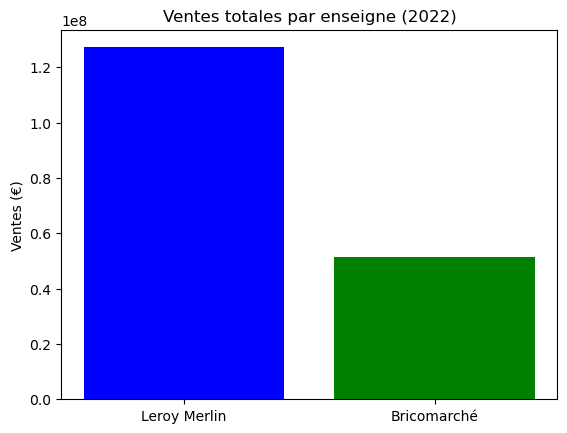

In [29]:
# Ventes totales par enseigne
total_sales_lr = lr_sales_22_23['Total_annuel_2022'].sum()
total_sales_br = br_sales_22_23['Total_annuel_2022'].sum()

# Graphique des ventes totales
plt.bar(['Leroy Merlin', 'Bricomarché'], [total_sales_lr, total_sales_br], color=['blue', 'green'])
plt.title("Ventes totales par enseigne (2022)")
plt.ylabel("Ventes (€)")
plt.show()

In [31]:
# Corrélation entre investissements et ventes pour Leroy Merlin
corr_data = lr_data[['Total_annuel_2022', 'BUDGET_ESTIMÉ', 'Total_visites_annuelles_2022']].dropna()
correlation_matrix = corr_data.corr()
print("Corrélations entre les variables :", correlation_matrix)

# Heatmap des corrélations (avec Plotly)
fig = px.imshow(correlation_matrix, text_auto=True, title="Corrélations Leroy Merlin")
fig.show()

Corrélations entre les variables :                               Total_annuel_2022  Total_visites_annuelles_2022
Total_annuel_2022                      1.000000                      0.276788
Total_visites_annuelles_2022           0.276788                      1.000000


In [35]:
# Carte des ventes par ville
geo_data = lr_data.groupby('Ville_x')['Total_annuel_2022'].sum().reset_index()
fig = px.bar(geo_data, x='Ville', y='Total_annuel_2022', title="Ventes par ville (Leroy Merlin)")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Ville_x', 'Total_annuel_2022'] but received: Ville

In [37]:
%pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
br_data = br_sales_22_23.merge(
    br_donnee_brute_merch_22_23, left_on='Code_du_Point_de_Vente', right_on='CODE_STATIGEST', how='left'
).merge(
    br_pp_22_23, left_on='Code_du_Point_de_Vente', right_on='CODE_DU_POINT_DE_VENTE', how='left'
).merge(
    br_visites_annuelles, left_on='Code_du_Point_de_Vente', right_on='CODE_INTERNE_UNIQUE_DU_POINT_DE_VENTE', how='left'
)


In [43]:
lr_data

,Code_du_Point_de_Vente,Raison_Sociale_x,Code_Postal_x,Ville_x,Code_Chef_de_Secteur_Henkel,Total_Famille,Famille,Total_annuel_2022,Total_annuel_2023,Total_annuel_Evol,...,MODALITÉS,PAIEMENT,PÉRIODE,BUDGET_ACCORD_HT_€,CODE_INTERNE_UNIQUE_DU_POINT_DE_VENTE,Raison_Sociale_y,Ville_y,Code_Postal_y,Total_visites_annuelles_2022,Total_visites_annuelles_2023
0,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,ValeurFixe,PP,Annéecomplète,2000.00,20nrr,LEROYMERLIN-181,QUIMPER,29000.0,45.0,45.0
1,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,ValeurFixe,PP,Annéecomplète,350.00,20nrr,LEROYMERLIN-181,QUIMPER,29000.0,45.0,45.0
2,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,NaN,NaN,NaN,1800.00,20nrr,LEROYMERLIN-181,QUIMPER,29000.0,45.0,45.0
3,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,ValeurFixe,PP,Annéecomplète,2000.00,20nrr,LEROYMERLIN-181,QUIMPER,29000.0,45.0,45.0
4,20nrr,LEROYMERLIN-181,29000,QUIMPER,443,TOTALHENKEL,NaN,214557.0,241343.0,12.48%,...,ValeurFixe,PP,Annéecomplète,350.00,20nrr,LEROYMERLIN-181,QUIMPER,29000.0,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-PLOMBERIE,5488.0,5525.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15692,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-SOL,3911.0,8245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15693,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-DECO,4968.0,5349.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15694,20vnp,LEROYMERLIN-290,97420,LEPORT,612,NaN,-QUINCAILLERIE,2468.0,4053.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Conversion des colonnes nécessaires en numériques
def clean_numeric_columns(df, columns):
    for col in columns:
        if df[col].dtype == object:
            df[col] = (
                df[col]
                .str.replace('€', '', regex=False)
                .str.replace('\u202f', '', regex=False)
                .str.replace(',', '.', regex=False)
                .astype(float)
            )
    return df

lr_data = clean_numeric_columns(lr_data, ['BUDGET_ESTIMÉ', 'Total_annuel_2022', 'Total_visites_annuelles_2022'])
br_data = clean_numeric_columns(br_data, ['BUDGET_ESTIMÉ', 'Total_annuel_2022', 'Total_visites_annuelles_2022'])

# Données combinées
combined_data = pd.concat([lr_data, br_data], axis=0)


In [46]:
# Initialisation de l'application Dash
app = Dash(__name__)
app.title = "Tableau de Bord : Optimisation des Ressources"

In [47]:
app.layout = html.Div([
    html.H1("Tableau de Bord : Optimisation et Prévisions des Ventes", style={'textAlign': 'center'}),
    
    # Section 1: Vue globale
    html.Div([
        html.H2("Vue Globale des Performances"),
        dcc.Graph(id='total-sales'),
        dcc.Graph(id='category-comparison'),
    ]),

    # Section 2: Corrélations et Analyses
    html.Div([
        html.H2("Corrélations et Analyses"),
        dcc.Graph(id='correlation-heatmap'),
        dcc.Graph(id='scatter-budget-sales'),
        dcc.Graph(id='scatter-visits-sales'),
    ]),

    # Section 3: Segmentation et Analyse Géographique
    html.Div([
        html.H2("Segmentation et Analyse Géographique"),
        dcc.Graph(id='clustering'),
        dcc.Graph(id='geo-sales'),
    ]),

    # Section 4: Simulations
    html.Div([
        html.H2("Simulations et Projections"),
        dcc.Slider(
            id='budget-slider',
            min=0.5,
            max=1.5,
            step=0.1,
            value=1,
            marks={0.5: '50%', 1: '100%', 1.5: '150%'}
        ),
        dcc.Graph(id='sales-projection'),
    ]),
])

In [48]:
# Mise à jour des visualisations en fonction des interactions
@app.callback(
    Output('total-sales', 'figure'),
    Input('budget-slider', 'value')
)
def update_total_sales(budget_multiplier):
    # Calcul des ventes totales
    lr_total = (lr_data['Total\nannuel\n2022'] * budget_multiplier).sum()
    br_total = (br_data['Total\nannuel\n2022'] * budget_multiplier).sum()
    fig = go.Figure(data=[
        go.Bar(name='Leroy Merlin', x=['Total'], y=[lr_total]),
        go.Bar(name='Bricomarché', x=['Total'], y=[br_total])
    ])
    fig.update_layout(barmode='group', title="Ventes Totales par Enseigne (avec ajustement du budget)")
    return fig

@app.callback(
    Output('correlation-heatmap', 'figure'),
    Input('budget-slider', 'value')
)
def update_correlation_heatmap(budget_multiplier):
    # Heatmap des corrélations
    correlation_matrix = combined_data.corr()
    fig = px.imshow(correlation_matrix, text_auto=True, title="Matrice de Corrélations")
    return fig

@app.callback(
    Output('scatter-budget-sales', 'figure'),
    Input('budget-slider', 'value')
)
def update_budget_sales_scatter(budget_multiplier):
    # Relation entre le budget et les ventes
    combined_data['Adjusted Budget'] = combined_data['BUDGET_ESTIMÉ'] * budget_multiplier
    fig = px.scatter(combined_data, x='Adjusted Budget', y='Total\nannuel\n2022', color='Ville',
                     title="Relation entre Budget Ajusté et Ventes")
    return fig

In [49]:
if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py:3621, in Index.get_loc(
    self=Index(['Code_du_Point_de_Vente', 'Raison_Sociale...l_visites_annuelles_2023'],
      dtype='object'),
    key='Total\nannuel\n2022',
    method=None,
    tolerance=None
)
   3620 try:
-> 3621     return self._engine.get_loc(casted_key)
        casted_key = 'Total\nannuel\n2022'
        self = Index(['Code_du_Point_de_Vente', 'Raison_Sociale_x', 'Code_Postal_x',
       'Ville_x', 'Code_Chef_de_Secteur_Henkel', 'Total_Famille', 'Famille',
       'Total_annuel_2022', 'Total_annuel_2023', 'Total_annuel_Evol',
       'Total_YTD_2022', 'Total_YTD_2023', 'Total_YTD_Evol', 'Janvier_2022',
       'Janvier_2023', 'Janvier_Evol', 'Février_2022', 'Février_2023',
       'Février_Evol', 'Mars_2022', 'Mars_2023', 'Mars_Evol', 'Avril_2022',
      

In [50]:
# Afficher les colonnes du DataFrame lr_data
print("Colonnes de lr_data :", lr_data.columns.tolist())

# Afficher les colonnes du DataFrame br_data
print("Colonnes de br_data :", br_data.columns.tolist())

Colonnes de lr_data : ['Code_du_Point_de_Vente', 'Raison_Sociale_x', 'Code_Postal_x', 'Ville_x', 'Code_Chef_de_Secteur_Henkel', 'Total_Famille', 'Famille', 'Total_annuel_2022', 'Total_annuel_2023', 'Total_annuel_Evol', 'Total_YTD_2022', 'Total_YTD_2023', 'Total_YTD_Evol', 'Janvier_2022', 'Janvier_2023', 'Janvier_Evol', 'Février_2022', 'Février_2023', 'Février_Evol', 'Mars_2022', 'Mars_2023', 'Mars_Evol', 'Avril_2022', 'Avril_2023', 'Avril_Evol', 'Mai_2022', 'Mai_2023', 'Mai_Evol', 'Juin_2022', 'Juin_2023', 'Juin_Evol', 'Juillet_2022', 'Juillet_2023', 'Juillet_Evol', 'Août_2022', 'Août_2023', 'Août_Evol', 'Septembre_2022', 'Septembre_2023', 'Septembre_Evol', 'Octobre_2022', 'Octobre_2023', 'Octobre_Evol', 'Novembre_2022', 'Novembre_2023', 'Novembre_Evol', 'Décembre_2022', 'Décembre_2023', 'Décembre_Evol', 'ANNEE_x', 'CODE_STATIGEST', 'RAISON_SOCIALE_x', 'CODE_POSTAL_x', 'VILLE_x', 'TYPE_PARTENARIAT', 'PASSAGE', 'HEURES', 'BUDGET_ESTIMÉ', 'CODE_Chef_de_secteur_x', 'ANNEE_y', 'CODE_DU_POI

In [52]:
%pip install streamlit

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.3 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spotdl 4.2.4 requires requests<3.0.0,>=2.31.0, but you have requests 2.28.1 which is incompatible.
spotdl 4.2.4 requires setuptools<70.0.0,>=69.0.2, but you have setuptools 75.1.0 which is incompatible.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but 

In [57]:
# enregistrement des données
lr_data.to_csv("lr_data_cleaned.csv", index=False)
br_data.to_csv("br_data_cleaned.csv", index=False)

In [63]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger et nettoyer les données
def load_and_clean_data():
    # Charger les données
    lr_data = pd.read_csv("lr_data_cleaned.csv")
    br_data = pd.read_csv("br_data_cleaned.csv")
    
    # Nettoyer les colonnes numériques
    numeric_columns = ['Total_annuel_2022', 'Total_annuel_2023', 'BUDGET_ESTIMÉ', 
                       'Total_visites_annuelles_2022', 'Total_visites_annuelles_2023']
    
    def clean_numeric_columns(df, columns):
        for col in columns:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace('€', '', regex=False).str.replace(',', '.', regex=False).str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')
        return df
    
    lr_data = clean_numeric_columns(lr_data, numeric_columns)
    br_data = clean_numeric_columns(br_data, numeric_columns)

    # Fusionner les données et ajouter des colonnes calculées
    combined_data = pd.concat([lr_data, br_data], axis=0)
    combined_data['Différence_Ventes'] = combined_data['Total_annuel_2023'] - combined_data['Total_annuel_2022']
    combined_data['Croissance (%)'] = (combined_data['Différence_Ventes'] / combined_data['Total_annuel_2022']) * 100
    return combined_data

# Charger les données
combined_data = load_and_clean_data()

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Layout du tableau de bord
app.layout = html.Div([
    html.H1("Dashboard Henkel : Optimisation des Ventes", style={'text-align': 'center'}),

    # Dropdown pour choisir l'analyse
    html.Div([
        dcc.Dropdown(
            id='analysis-type',
            options=[
                {'label': 'Évolution Globale des Ventes', 'value': 'global'},
                {'label': 'Performances par Catégorie', 'value': 'category'},
                {'label': 'Carte des Évolutions par Ville', 'value': 'map'},
                {'label': 'Corrélations Entre Variables', 'value': 'correlation'},
                {'label': 'Top Villes Gagnantes/Perdantes', 'value': 'top_cities'},
                {'label': 'Simulation Budgétaire', 'value': 'simulation'}
            ],
            value='global',
            style={'width': '60%', 'margin': '0 auto'}
        )
    ]),

    # Contenu dynamique
    html.Div(id='dynamic-content', style={'margin-top': '20px'})
])

# Callback pour gérer le contenu dynamique
@app.callback(
    Output('dynamic-content', 'children'),
    [Input('analysis-type', 'value')]
)
def update_content(analysis_type):
    if analysis_type == 'global':
        global_sales = combined_data[['Total_annuel_2022', 'Total_annuel_2023']].sum()
        fig = px.bar(
            x=global_sales.index, 
            y=global_sales.values,
            labels={'x': 'Année', 'y': 'Ventes Totales (€)'},
            title="Ventes Totales : 2022 vs 2023"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'category':
        category_diff = combined_data.groupby('Famille')[['Total_annuel_2022', 'Total_annuel_2023']].sum()
        category_diff['Différence'] = category_diff['Total_annuel_2023'] - category_diff['Total_annuel_2022']
        fig = px.bar(
            category_diff.reset_index(),
            x='Famille', y='Différence',
            labels={'Différence': 'Différence de Ventes (€)', 'Famille': 'Catégorie'},
            title="Évolution des Ventes par Catégorie"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'map':
        # Ajouter des coordonnées fictives pour exemple
        geoloc = {
            "Paris": (48.8566, 2.3522), "Lyon": (45.7640, 4.8357), "Marseille": (43.2965, 5.3698),
        }
        combined_data['Coordinates'] = combined_data['Ville_x'].map(geoloc)
        combined_data_filtered = combined_data.dropna(subset=['Coordinates'])
        combined_data_filtered['Latitude'] = combined_data_filtered['Coordinates'].apply(lambda x: x[0])
        combined_data_filtered['Longitude'] = combined_data_filtered['Coordinates'].apply(lambda x: x[1])
        fig = px.scatter_mapbox(
            combined_data_filtered, lat='Latitude', lon='Longitude', size='Différence_Ventes',
            color='Différence_Ventes', hover_name='Ville_x',
            title="Carte des Évolutions de Ventes (2022-2023)",
            mapbox_style="carto-positron"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'correlation':
        correlation_matrix = combined_data[['Total_annuel_2022', 'Total_annuel_2023', 'BUDGET_ESTIMÉ', 
                                            'Total_visites_annuelles_2022', 'Total_visites_annuelles_2023']].corr()
        fig = px.imshow(
            correlation_matrix,
            text_auto=True,
            title="Matrice de Corrélations : Ventes, Budget, Visites"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'top_cities':
        top_cities = combined_data.sort_values('Différence_Ventes', ascending=False).head(10)
        fig = px.bar(
            top_cities,
            x='Ville_x',
            y='Différence_Ventes',
            labels={'Différence_Ventes': 'Différence de Ventes (€)', 'Ville_x': 'Ville'},
            title="Top 10 des Villes Gagnantes (Différence Ventes 2022-2023)"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'simulation':
        combined_data['Budget Ajusté'] = combined_data['BUDGET_ESTIMÉ'] * 1.1  # Exemple : +10% budget
        fig = px.scatter(
            combined_data,
            x='Budget Ajusté', y='Différence_Ventes',
            labels={'Budget Ajusté': 'Budget Ajusté (€)', 'Différence_Ventes': 'Différence de Ventes (€)'},
            title="Impact du Budget Ajusté sur les Ventes"
        )
        return dcc.Graph(figure=fig)

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)

In [66]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Charger et nettoyer les données
def load_and_clean_data():
    # Charger les données
    lr_data = pd.read_csv("lr_data_cleaned.csv")
    br_data = pd.read_csv("br_data_cleaned.csv")
    
    # Nettoyer les colonnes numériques
    numeric_columns = ['Total_annuel_2022', 'Total_annuel_2023', 'BUDGET_ESTIMÉ', 
                       'Total_visites_annuelles_2022', 'Total_visites_annuelles_2023']
    
    def clean_numeric_columns(df, columns):
        for col in columns:
            if df[col].dtype == 'object':
                df[col] = df[col].str.replace('€', '', regex=False).str.replace(',', '.', regex=False).str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')
        return df
    
    lr_data = clean_numeric_columns(lr_data, numeric_columns)
    br_data = clean_numeric_columns(br_data, numeric_columns)

    # Fusionner les données et ajouter des colonnes calculées
    combined_data = pd.concat([lr_data, br_data], axis=0)
    combined_data['Différence_Ventes'] = combined_data['Total_annuel_2023'] - combined_data['Total_annuel_2022']
    combined_data['Croissance (%)'] = (combined_data['Différence_Ventes'] / combined_data['Total_annuel_2022']) * 100
    combined_data['ROI'] = combined_data['Total_annuel_2023'] / combined_data['BUDGET_ESTIMÉ']
    return combined_data

# Charger les données
combined_data = load_and_clean_data()

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Layout du tableau de bord
app.layout = html.Div([
    html.H1("Dashboard Henkel : Optimisation des Ventes", style={'text-align': 'center'}),

    # KPI Section
    html.Div([
        html.Div([
            html.H3("Ventes Totales 2022 (€)"),
            html.P(f"{combined_data['Total_annuel_2022'].sum():,.2f}")
        ], style={'display': 'inline-block', 'width': '20%', 'text-align': 'center'}),
        
        html.Div([
            html.H3("Ventes Totales 2023 (€)"),
            html.P(f"{combined_data['Total_annuel_2023'].sum():,.2f}")
        ], style={'display': 'inline-block', 'width': '20%', 'text-align': 'center'}),
        
        html.Div([
            html.H3("Croissance Totale (%)"),
            html.P(f"{combined_data['Croissance (%)'].mean():,.2f}%")
        ], style={'display': 'inline-block', 'width': '20%', 'text-align': 'center'}),
        
        html.Div([
            html.H3("Budget Total Investi (€)"),
            html.P(f"{combined_data['BUDGET_ESTIMÉ'].sum():,.2f}")
        ], style={'display': 'inline-block', 'width': '20%', 'text-align': 'center'}),
        
        html.Div([
            html.H3("ROI Moyen"),
            html.P(f"{combined_data['ROI'].mean():,.2f}")
        ], style={'display': 'inline-block', 'width': '20%', 'text-align': 'center'}),
    ], style={'margin': '20px 0', 'display': 'flex', 'justify-content': 'space-around'}),
    
    # Dropdown pour choisir l'analyse
    html.Div([
        dcc.Dropdown(
            id='analysis-type',
            options=[
                {'label': 'Évolution Globale des Ventes', 'value': 'global'},
                {'label': 'Performances par Catégorie', 'value': 'category'},
                {'label': 'Carte des Évolutions par Ville', 'value': 'map'},
                {'label': 'Corrélations Entre Variables', 'value': 'correlation'},
                {'label': 'Top Villes Gagnantes/Perdantes', 'value': 'top_cities'},
                {'label': 'Simulation Budgétaire', 'value': 'simulation'}
            ],
            value='global',
            style={'width': '60%', 'margin': '0 auto'}
        )
    ]),

    # Contenu dynamique
    html.Div(id='dynamic-content', style={'margin-top': '20px'})
])

# Callback pour gérer le contenu dynamique
@app.callback(
    Output('dynamic-content', 'children'),
    [Input('analysis-type', 'value')]
)
def update_content(analysis_type):
    if analysis_type == 'global':
        global_sales = combined_data[['Total_annuel_2022', 'Total_annuel_2023']].sum()
        fig = px.bar(
            x=global_sales.index, 
            y=global_sales.values,
            labels={'x': 'Année', 'y': 'Ventes Totales (€)'},
            title="Ventes Totales : 2022 vs 2023"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'category':
        category_diff = combined_data.groupby('Famille')[['Total_annuel_2022', 'Total_annuel_2023']].sum()
        category_diff['Différence'] = category_diff['Total_annuel_2023'] - category_diff['Total_annuel_2022']
        fig = px.bar(
            category_diff.reset_index(),
            x='Famille', y='Différence',
            labels={'Différence': 'Différence de Ventes (€)', 'Famille': 'Catégorie'},
            title="Évolution des Ventes par Catégorie"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'map':
        geoloc = {"Paris": (48.8566, 2.3522), "Lyon": (45.7640, 4.8357), "Marseille": (43.2965, 5.3698)}
        combined_data['Coordinates'] = combined_data['Ville_x'].map(geoloc)
        filtered_data = combined_data.dropna(subset=['Coordinates'])
        filtered_data['Latitude'] = filtered_data['Coordinates'].apply(lambda x: x[0])
        filtered_data['Longitude'] = filtered_data['Coordinates'].apply(lambda x: x[1])
        fig = px.scatter_mapbox(
            filtered_data, lat='Latitude', lon='Longitude', size='Différence_Ventes',
            color='Différence_Ventes', hover_name='Ville_x',
            title="Carte des Évolutions de Ventes (2022-2023)",
            mapbox_style="carto-positron"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'correlation':
        correlation_matrix = combined_data[['Total_annuel_2022', 'Total_annuel_2023', 'BUDGET_ESTIMÉ', 
                                            'Total_visites_annuelles_2022', 'Total_visites_annuelles_2023']].corr()
        fig = px.imshow(
            correlation_matrix,
            text_auto=True,
            title="Matrice de Corrélations : Ventes, Budget, Visites"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'top_cities':
        top_cities = combined_data.sort_values('Différence_Ventes', ascending=False).head(10)
        fig = px.bar(
            top_cities,
            x='Ville_x',
            y='Différence_Ventes',
            labels={'Différence_Ventes': 'Différence de Ventes (€)', 'Ville_x': 'Ville'},
            title="Top 10 des Villes Gagnantes (Différence Ventes 2022-2023)"
        )
        return dcc.Graph(figure=fig)

    elif analysis_type == 'simulation':
        combined_data['Budget Ajusté'] = combined_data['BUDGET_ESTIMÉ'] * 1.1  # Exemple : +10% budget
        fig = px.scatter(
            combined_data,
            x='Budget Ajusté', y='Différence_Ventes',
            labels={'Budget Ajusté': 'Budget Ajusté (€)', 'Différence_Ventes': 'Différence de Ventes (€)'},
            title="Impact du Budget Ajusté sur les Ventes"
        )
        return dcc.Graph(figure=fig)

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)